In [1]:
import json

data_path = "bert_base_checkpoint/checkpoint-21800/trainer_state.json"

f = json.load(open(data_path))
eval_losses = []
eval_epochs = []
train_losses = []
train_epochs = []
for log in f["log_history"]:
    if "eval_loss" in log:
        eval_losses.append(log["eval_loss"])
        eval_epochs.append(log["epoch"])

    if "loss" in log:
        train_losses.append(log["loss"])
        train_epochs.append(log["epoch"])

In [2]:
import numpy as np

window_size = 5

averaged_train_losses = []
averaged_eval_losses = []

for i in range(len(train_losses)):
    train_window = train_losses[
        max(0, i - window_size // 2) : min(len(train_losses), i + window_size // 2 + 1)
    ]
    averaged_train_losses.append(np.mean(train_window))

for i in range(len(eval_losses)):
    eval_window = eval_losses[
        max(0, i - window_size // 2) : min(len(eval_losses), i + window_size // 2 + 1)
    ]
    averaged_eval_losses.append(np.mean(eval_window))

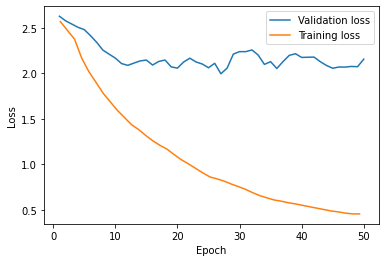

In [3]:
import matplotlib.pyplot as plt

plt.plot(eval_epochs, averaged_eval_losses, label="Validation loss")
plt.plot(train_epochs, averaged_train_losses, label="Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")